##**Titanic Survival Prediction System**


**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

**Loading the dataset**   
Retrieved from: https://www.kaggle.com/competitions/titanic/data 

In [ ]:
#Mount the drive to access the dataset

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Printing top 10 rows from the dataset.

In [ ]:
#Loading the dataset using pandas

dataset = pd.read_csv('/content/gdrive/MyDrive/Machine Learning and Parallel Computing_Practical/Assignment/train.csv')

dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


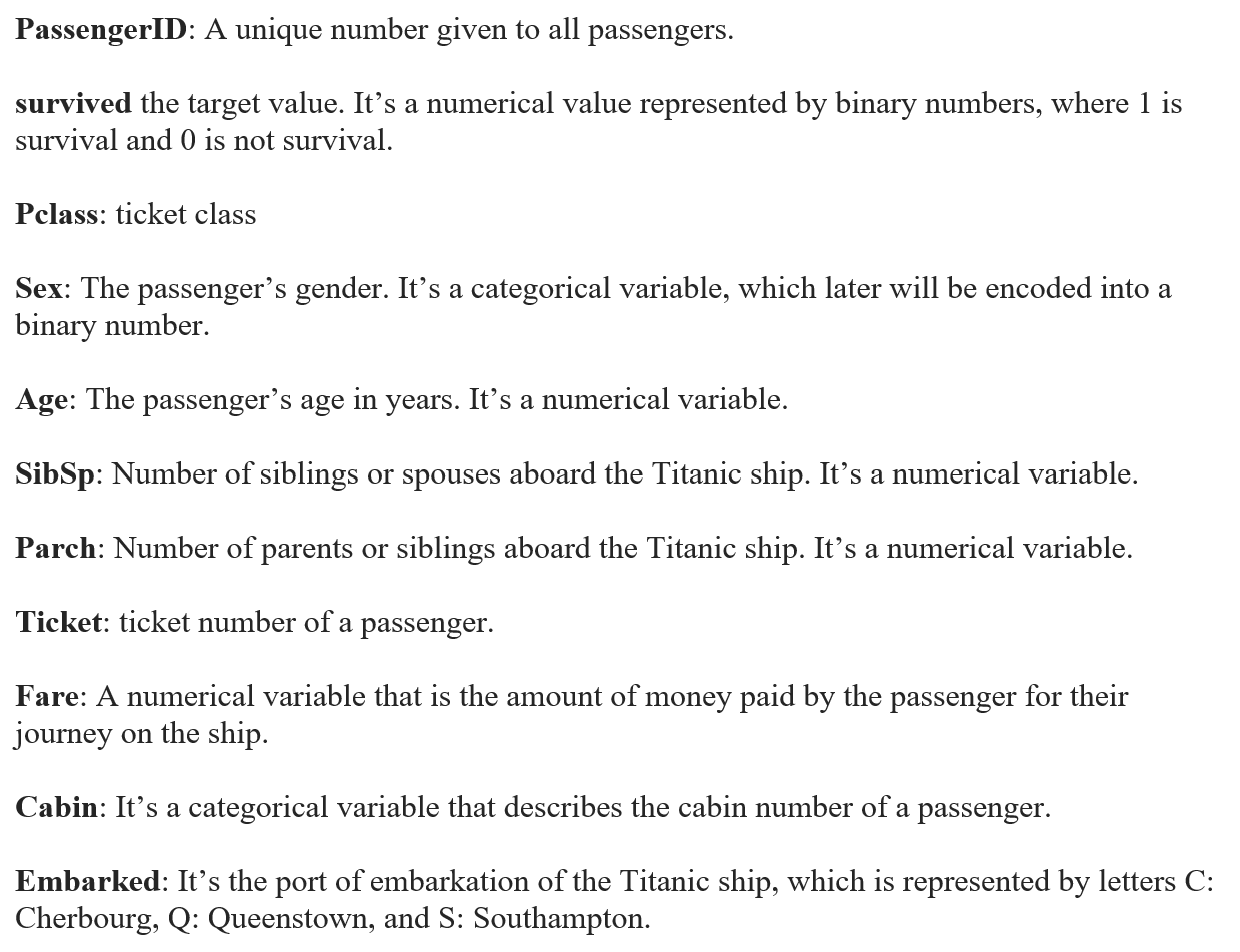

In [ ]:
#number of rows and columns

dataset.shape

(891, 12)

**Descriptive Statistics of the dataset**

In [ ]:
#Descriptive statistics of the dataset

dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Data Types**

In [ ]:
#Finding the data types 

dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Check the missing values**

In [ ]:
#Check the missing values 

dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_values = dataset.isnull()
null_values.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
for i in null_values.columns.values.tolist():
    print (i)
    print (null_values[i].value_counts())
    print ('')

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age variable and cabin variable have the highest missing data in it. The age has 177 missing data while the cabin has 687 missing values. The embarked variable has 2 missing data.

In [ ]:
#Remove cabin column from the dataset since it has almost 77% missing data in it.

dataset = dataset.drop(dataset[['Cabin']], axis = 1)

In [ ]:
#Recheck the dataset after dropped the cabin column

dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
#Replace missing data in age with mean value

age_mean = dataset['Age'].astype('float').mean(axis=0)

#Used math.trunc() function to round off the integer to 1 decimal point
final_mean = math.trunc(age_mean)
dataset['Age'].replace(np.nan, final_mean, inplace=True)

In [ ]:
dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


Find mode of "Embarked" column to replace the missing data of it.

In [ ]:
#Find mode of the embarked column

dataset['Embarked'].mode()

0    S
dtype: object

In [ ]:
#Replacing missing data in Embarked column with mode data

dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [ ]:
#Recheck the missing data 
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
check_null = dataset.isnull()

check_null.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


**Exploratory data analysis**

In [ ]:
#Finding the number of people survived and not survived

dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

As you can see here, 0 shows how many of them did not survived while 1 shows how many survived. A total number of 549 passengers did not survive while 342 passengers has survived.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

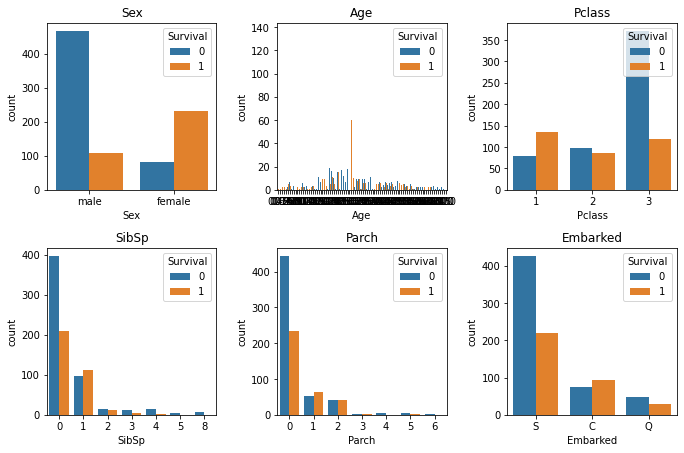

In [ ]:

# Visualize the count of survivors for columns 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked'
columns = ['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_columns = 3


fig, axs = plt.subplots(n_rows, n_columns, figsize=(n_columns*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_columns):  
        
        i = r*n_columns+ c      
        ax = axs[r][c]
        sns.countplot(dataset[columns[i]], hue=dataset["Survived"], ax=ax)
        ax.set_title(columns[i])
        ax.legend(title="Survival", loc='upper right') 
        
plt.tight_layout()   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival')

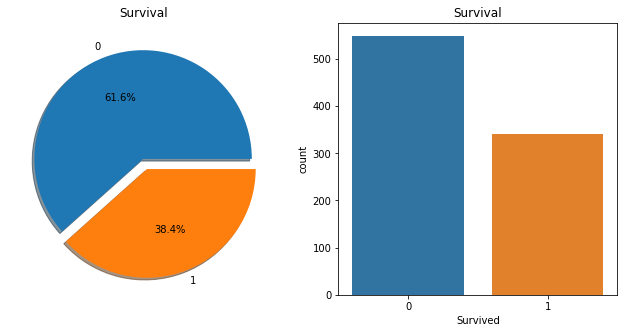

In [ ]:
#Making a countplot and piechart to show the survival

#Pie Chart
f,ax=plt.subplots(1,2,figsize=(11,5))
dataset['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survival')
ax[0].set_ylabel('')

#Countplot
sns.countplot('Survived', data = dataset, ax=ax[1])
ax[1].set_title("Survival")


Let's just focus on the female and male survival

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'counts')

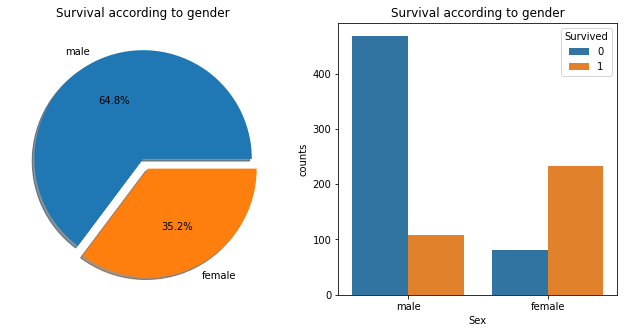

In [ ]:
#Pie chart
f,ax=plt.subplots(1,2,figsize=(11,5))
dataset['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survival according to gender')
ax[0].set_ylabel('')

#Countplot
gc = sns.countplot('Sex', hue = 'Survived', data = dataset)
gc.set_title('Survival according to gender')
gc.set_ylabel('counts')

As you can see here male has a higher dead rate compared to female.

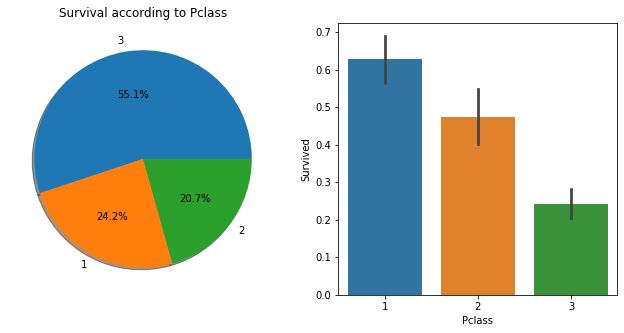

In [ ]:
#Pie chart
f,ax=plt.subplots(1,2,figsize=(11,5))
dataset['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survival according to Pclass')
ax[0].set_ylabel('')

#Countplot
sns.barplot(x='Pclass', y='Survived', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


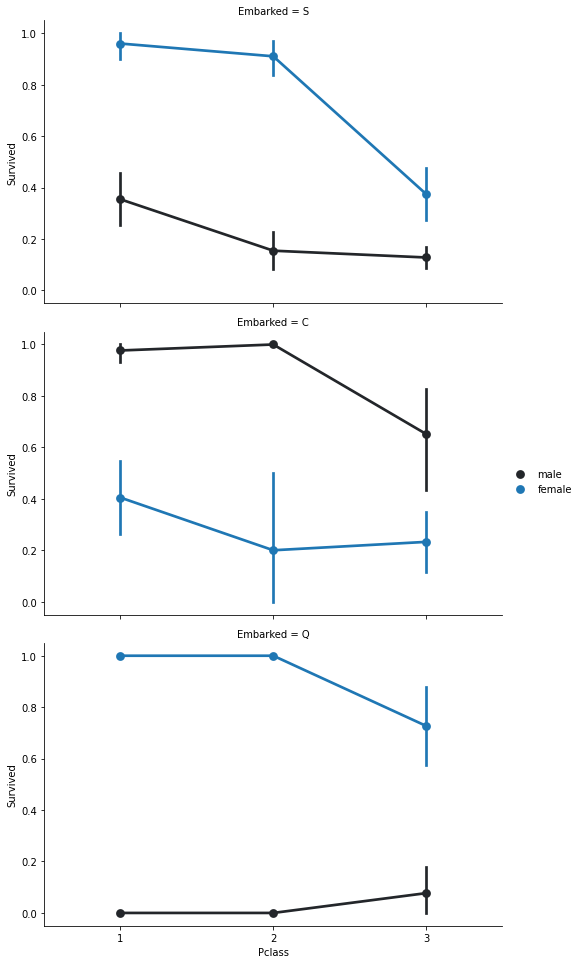

In [ ]:
#Embarked, Pclass and Sex

FacetGrid = sns.FacetGrid(dataset, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [ ]:
#Pivot table showing survival rate according to sex
dataset.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Male has only 18.89% survival rate while female has 74.2% survival rate.

In [ ]:
#Pivot table showing survival rate according to sex
dataset.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


The majority is female from 1st class which has 96.81% survival rate while the lowest is male from 3rd class which has a survival rate of 13.55%.

**Feature Engineering**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Encoding the categorical columns

In [ ]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Convert categorical columns to numerical like binary numbers

dataset.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0,'C':1,'Q':2}}, inplace = True)

#male = 0, female = 1

In [ ]:
#Recheck the data

dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1


**Correlation**

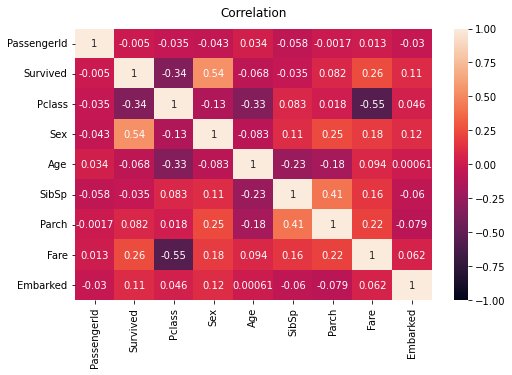

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

hmp = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)

hmp.set_title('Correlation', fontdict={'fontsize':12}, pad=12);

Text(0.5, 1.0, 'Features correlation with Survived')

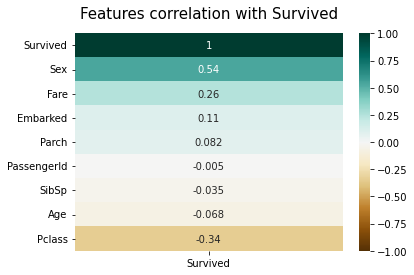

In [ ]:
heatmap = sns.heatmap(dataset.corr()[['Survived']].sort_values(by='Survived', ascending = False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlation with Survived', fontdict={'fontsize':15}, pad=15)

As you can see, survived is highly positively correlated to sex, fare, and embarked while highly negatively correlated to pclass.

**Seperating features and Target values**

Split the data into independent value which is X and dependent value which is Y.

The target value is 'Survived'. = Y

In [ ]:
X = dataset.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis = 1)
Y = dataset['Survived']

In [ ]:
print(X)
print(Y)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  29.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


**Splitting data into train and test set**

Split the data again into 70% training (X_train and Y_train) and 30% testing (X_test and Y_test) data sets.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (623, 7) (268, 7)


**Machine Learning**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logm = LogisticRegression()
logm.fit(X_train, Y_train)
y_pred_l = logm.predict(X_test)
accu_logm = round(accuracy_score(y_pred_l, Y_test) * 100, 2)
print("Accuracy of Logistic Regression model:", accu_logm)

from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=Y_test,y_pred=y_pred_l)
mse = mean_squared_error(y_true=Y_test,y_pred=y_pred_l) 
rmse = mean_squared_error(y_true=Y_test,y_pred=y_pred_l,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


Accuracy of Logistic Regression model: 80.22
MAE: 0.19776119402985073
MSE: 0.19776119402985073
RMSE: 0.4447034900131218


**Random Forest Classifier**

Accuracy of Random Tree Classifier model: 82.46
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Confusion matrix for Random Tree Classifier:
[[147  21]
 [ 26  74]]


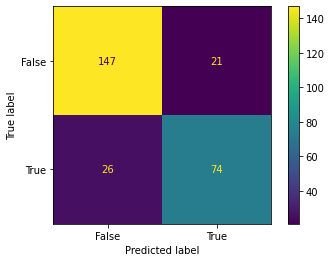

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ram = RandomForestClassifier()
ram.fit(X_train,Y_train)
y_pred_r = ram.predict(X_test)
accu_ram = round(accuracy_score(y_pred_r, Y_test) * 100, 2)
print("Accuracy of Random Tree Classifier model:", accu_ram)

print(classification_report(Y_test, y_pred_r))
print("Confusion matrix for Random Tree Classifier:")
r_conf = confusion_matrix(Y_test,y_pred_r)
print(r_conf)
cf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = r_conf, display_labels = [False, True])
cf_display.plot()
plt.show()

**Decision Tree Classifier**

Accuracy of Decision Tree Classifier model: 79.85
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.74      0.71      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

Confusion matrix for Decision Tree Classifier:
[[143  25]
 [ 29  71]]


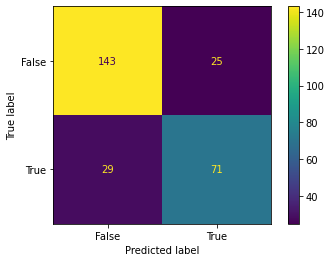

In [ ]:
from sklearn.tree import DecisionTreeClassifier

desc_model = DecisionTreeClassifier()
desc_model.fit(X_train, Y_train)
y_pred_d = desc_model.predict(X_test)
acc_desc_model = round(accuracy_score(y_pred_d, Y_test) * 100, 2)
print("Accuracy of Decision Tree Classifier model:", acc_desc_model)

print(classification_report(Y_test, y_pred_d))
print("Confusion matrix for Decision Tree Classifier:")
d_conf = confusion_matrix(Y_test,y_pred_d)
print(d_conf)
df_display = metrics.ConfusionMatrixDisplay(confusion_matrix = d_conf, display_labels = [False, True])
df_display.plot()
plt.show()

**Final Prediction model**

Among the three machine learning models, the **Random Tree Classifier** has the highest accuracy, which is **82.46%**.

In [ ]:
print(y_pred_r)

[0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]


The 0 is not survived while the 1 is survived.